# 1.1 - Data engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
filepath = 'bank-account-fraud-dataset-neurips-2022/Base.csv'
df = pd.read_csv(filepath)



Repartition of fraud : 0.011029% frauds, 0.988971% non frauds


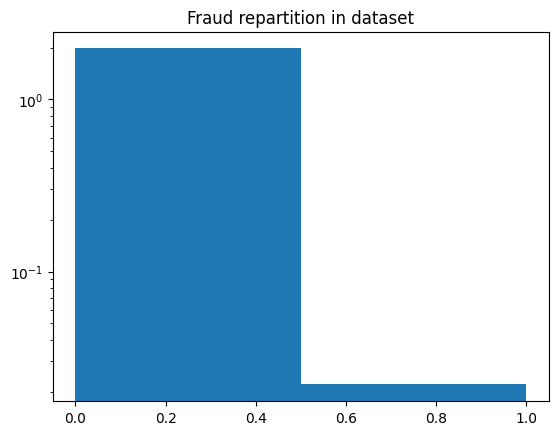

In [3]:
fraud = df["fraud_bool"].to_numpy()


class_weights = np.array([np.count_nonzero(fraud), len(fraud) - np.count_nonzero(fraud)])/len(fraud)
print("Repartition of fraud : {}% frauds, {}% non frauds".format(class_weights[0],class_weights[1]))

plt.yscale("log")
plt.hist(fraud, density= True, bins =2 )
plt.title("Fraud repartition in dataset")
plt.show()

In [4]:
s = (df.dtypes == 'object') # list of column-names and wether they contain categorical features
object_cols = list(s[s].index) # All the columns containing these features
print("All columns with categorical values")
print(df[object_cols])

for col in object_cols : 
    df_labels = df[col].str.get_dummies(' ')
    df = pd.concat([df,df_labels], axis = 1)
    df = df.drop([col],axis=1)


All columns with categorical values
       payment_type employment_status housing_status    source  device_os
0                AA                CA             BA  INTERNET    windows
1                AB                CA             BA  INTERNET    windows
2                AC                CB             BA  INTERNET      other
3                AB                CA             BA  INTERNET      linux
4                AB                CA             BA  INTERNET  macintosh
...             ...               ...            ...       ...        ...
999995           AB                CA             BC  INTERNET      linux
999996           AC                CC             BC  INTERNET    windows
999997           AA                CF             BC  INTERNET      other
999998           AA                CA             BA  INTERNET    windows
999999           AA                CA             BE  INTERNET      linux

[1000000 rows x 5 columns]


In [5]:
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,BE,BF,BG,INTERNET,TELEAPP,linux,macintosh,other,windows,x11
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,769,10650.765523,...,0,0,0,1,0,0,0,0,1,0
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,366,534.047319,...,0,0,0,1,0,0,0,0,1,0
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,870,4048.534263,...,0,0,0,1,0,0,0,1,0,0
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,810,3457.064063,...,0,0,0,1,0,1,0,0,0,0
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,890,5020.341679,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,-1,104,40,0.030592,-1.044454,804,7905.711839,...,0,0,0,1,0,1,0,0,0,0
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,3306,5391.470463,...,0,0,0,1,0,0,0,0,1,0
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,1522,8063.102636,...,0,0,0,1,0,0,0,1,0,0
999998,0,0.9,0.762112,-1,189,20,0.015352,94.661055,1418,8092.641762,...,0,0,0,1,0,0,0,0,1,0


NameError: name 'session' is not defined